# Classicication Images in black and white (MASK) using CNN 

In this code, the images related to tumor masses will be loaded in black and white (MASK). Subsequently, the characteristics will be evaluated and the corresponding training, validation, and test folders will be created.
Immediately after, I trained two models using TensorFlow for 10 and 20 epochs. 

# These neural networks did not yield good results.

### Data visualization and Data Splitting

In this part of the project, images are displayed, sizes are checked, and the dataset is split into training, testing, and validation sets, creating the appropriate folders.

In [3]:
#Import all the libraries needed in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import shutil
import random
import tensorflow as tf
import torch
#import statsmodels.api as sm

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, auc

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
'''# Dimensionality Reduction
from sklearn.decomposition import PCA

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Import tensorflow libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
'''
#Import torch libraries
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [4]:
#Defining the path to the image folders
benign_path = "benign_images/"
malignant_path = "malignant_images/"

In [5]:
# Function to load and display images
def show_images(folder_path, num_images=5):
    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"The path {folder_path} does not exist.")
        return

    # Get the image files
    image_files = os.listdir(folder_path)
    
    # Check if there are any images in the folder
    if len(image_files) == 0:
        print(f"No images found in the folder {folder_path}.")
        return

    # Limit the number of images to display if there are fewer than num_images
    image_files = image_files[:min(num_images, len(image_files))]

    # Create a plot to display the images
    fig = plt.figure(figsize=(10, 6))
    fig.suptitle(folder_path.split("/")[-2], fontsize=16)
    
    # Iterate over the image files and display them
    for i, image_file in enumerate(image_files, 1):
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax = fig.add_subplot(1, len(image_files), i)
        ax.imshow(image)
        ax.axis("off")
        ax.set_title(f"Image {i}")
    
    plt.show()

This function, *show_images*, loads and displays a specified number of images from a folder. Here's what it does:

**Check folder existence**: It checks if the specified folder exists at the given path.
Get image files: It gets the list of image files inside the folder.  
**Check for images**: It checks if there are any images in the folder.  
**Limit the number of images**: If the number of images in the folder exceeds the specified number (*num_images*), it selects only up to num_images for display.  
**Display images**: It creates a subplot grid and displays the loaded images from the folder, with each image consecutively numbered.  
The function is designed to facilitate quick visualization of a limited number of images from a given folder.

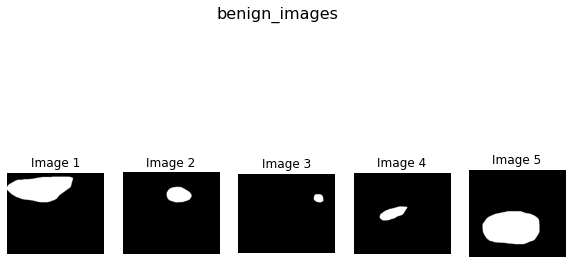

In [6]:
#Showing some images of benign tumors
show_images(benign_path)

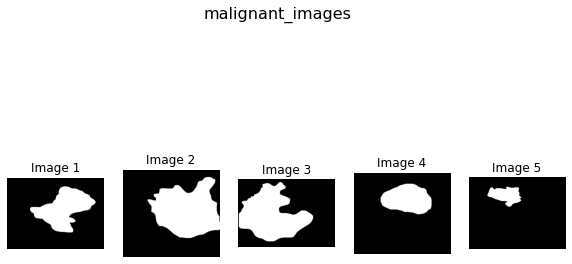

In [7]:
#Showing some images of malignant tumors
show_images(malignant_path)

In [8]:
def image_size_statistics(folder_path):
    heights = []
    widths = []
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path)
        height, width, _ = image.shape
        heights.append(height)
        widths.append(width)
    return heights, widths

This function, *image_size_statistics*, computes statistics about the sizes of images in the specified folder. Here's a summary of what it does:

**Initialization of height and width lists**: It initializes two empty lists, heights and widths, to store the heights and widths of the images.  
**Iteration over image files in the folder**: It iterates over each file in the specified folder.  
**Loading images**: It loads each image using OpenCV (*cv2.imread*) and retrieves its dimensions using the .shape attribute of the loaded image.  
**Adding dimensions to the lists**: It adds the height and width of the current image to the respective heights and widths lists.  
**Returning the lists of heights and widths**: It returns the lists of heights and widths of the images.

In essence, this function is useful for analyzing the dimensions of images in a given folder, providing a list of heights and widths for each image.

## Images statistics

In [9]:
# Bening images' statistics
benign_heights, benign_widths = image_size_statistics(benign_path)
num_benign_images = len(benign_heights)
print("Statistiche dimensioni tumori benigni:")
print(f"Numero totale di immagini: {num_benign_images}")
print(f"Dimensioni medie (altezza x larghezza): {sum(benign_heights) / num_benign_images} x {sum(benign_widths) / num_benign_images}")
print(f"Dimensioni minime (altezza x larghezza): {min(benign_heights)} x {min(benign_widths)}")
print(f"Dimensioni massime (altezza x larghezza): {max(benign_heights)} x {max(benign_widths)}")

Statistiche dimensioni tumori benigni:
Numero totale di immagini: 437
Dimensioni medie (altezza x larghezza): 495.47139588100686 x 613.3867276887872
Dimensioni minime (altezza x larghezza): 324 x 315
Dimensioni massime (altezza x larghezza): 719 x 1028


In [10]:
# Malignant images' statistics
malignant_heights, malignant_widths = image_size_statistics(malignant_path)
num_malignant_images = len(malignant_heights)
print("\nStatistiche dimensioni tumori maligni:")
print(f"Numero totale di immagini: {num_malignant_images}")
print(f"Dimensioni medie (altezza x larghezza): {sum(malignant_heights) / num_malignant_images} x {sum(malignant_widths) / num_malignant_images}")
print(f"Dimensioni minime (altezza x larghezza): {min(malignant_heights)} x {min(malignant_widths)}")
print(f"Dimensioni massime (altezza x larghezza): {max(malignant_heights)} x {max(malignant_widths)}")


Statistiche dimensioni tumori maligni:
Numero totale di immagini: 210
Dimensioni medie (altezza x larghezza): 494.01428571428573 x 597.9714285714285
Dimensioni minime (altezza x larghezza): 332 x 190
Dimensioni massime (altezza x larghezza): 677 x 1048


## Creation of the training, validation and test set

In [ ]:
# Define input and output folder paths
input_benign_path = "benign_images"
input_malignant_path = "malignant_images"
output_train_path = "dataset/train/"
output_val_path = "dataset/val/"
output_test_path = "dataset/test/"

In [ ]:
# Create output folders
os.makedirs(output_train_path, exist_ok=True)
os.makedirs(output_val_path, exist_ok=True)
os.makedirs(output_test_path, exist_ok=True)

In [ ]:
# Defining the dataset proportion (e.g., 70% train, 15% validation, 15% test)
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

In [ ]:
# Function to copy images from the input folder to the output folder
def copy_images(input_path, output_path, file_list):
    os.makedirs(output_path, exist_ok=True)
    for file_name in file_list:
        shutil.copy(os.path.join(input_path, file_name), output_path)

This function, copy_images, creates the output folder if it doesn't exist already, and then copies the specified list of files from the input folder to the output folder.

In [ ]:
# Get the list of files for benign and malignant tumors
benign_images = os.listdir(input_benign_path)
malignant_images = os.listdir(input_malignant_path)

In [ ]:
# Shuffle the lists of images randomly
random.shuffle(benign_images)
random.shuffle(malignant_images)

These two lines of code shuffle the lists of images for benign and malignant tumors randomly, which means they change the order of elements in the lists randomly.

In [ ]:
# dataset's dimensions
num_train_benign = int(len(benign_images) * train_ratio)
num_val_benign = int(len(benign_images) * val_ratio)
num_test_benign = len(benign_images) - num_train_benign - num_val_benign
num_train_malignant = int(len(malignant_images) * train_ratio)
num_val_malignant = int(len(malignant_images) * val_ratio)
num_test_malignant = len(malignant_images) - num_train_malignant - num_val_malignant

In [ ]:
# Copying images in folders
copy_images(input_benign_path, os.path.join(output_train_path, "benign"), benign_images[:num_train_benign])
copy_images(input_benign_path, os.path.join(output_val_path, "benign"), benign_images[num_train_benign:num_train_benign + num_val_benign])
copy_images(input_benign_path, os.path.join(output_test_path, "benign"), benign_images[-num_test_benign:])
copy_images(input_malignant_path, os.path.join(output_train_path, "malignant"), malignant_images[:num_train_malignant])
copy_images(input_malignant_path, os.path.join(output_val_path, "malignant"), malignant_images[num_train_malignant:num_train_malignant + num_val_malignant])
copy_images(input_malignant_path, os.path.join(output_test_path, "malignant"), malignant_images[-num_test_malignant:])

# Convolution neural networks

Convolutional neural networks try to mimic the operations carried out by the animal visual cortex.
By construction, they satisfy certain properties (e.g., invariance to small translations and rotations) that make them particularly successful in image recognition tasks.
Explaining the mathematical details of convolutional neural networks is beyond the scope.
The details presented in the lecture videos should be enough for this course and for building standard image classifiers.
If you want to know more, read Chapter 9 of `Goodfellow-et-al-2016`.

### Convolutional Neural Networks (CNN)

Convolutional Neural Networks (CNN) are a class of artificial neural networks designed for processing grid-like data, such as images. They consist of several layers, each with a specific role in feature extraction from the image and its classification. Here's a comprehensive explanation of CNN:

1. **Input Layer**: The input layer accepts the input image. The image is represented as a matrix of pixels, where each pixel has a value indicating its brightness or color intensity.

2. **Convolutional Layers**: Convolutional layers are the heart of CNNs. Each convolutional layer uses a set of filters (or kernels) to perform convolution operations on the input image. Convolution involves sliding the filter over the image and computing the weighted sum of overlapping pixels. This process allows the network to detect local patterns in the image, such as lines, shapes, and textures.

3. **Activation Function**: After convolution, the output is passed through a nonlinear activation function, such as ReLU (Rectified Linear Unit), to introduce nonlinearity into the network and enable it to learn more complex relationships in the data.

4. **Pooling Layers**: Pooling layers are used to reduce the spatial dimension of the image and the number of network parameters. Typically, pooling is performed through operations such as max pooling, which selects the maximum value within a pooling window, or average pooling, which computes the average of the values.

5. **Fully Connected Layers**: After several convolutional and pooling layers, the output is flattened into a vector and passed through one or more fully connected layers. These layers are similar to the layers of a traditional neural network and are responsible for the final classification of the image.

6. **Output Layer**: The output layer produces the final prediction of the network, which may be the probability that the image belongs to a certain class.

Mathematically, the convolution process can be represented as:
$$
 (I * K)(i, j) = \sum_{m} \sum_{n} I(m, n) \cdot K(i-m, j-n) 
$$

Where \(I\) is the input image, \(K\) is the convolution kernel, and \(i, j\) are the coordinates of the output. The sum is performed over all overlapping pixels after applying the kernel \(K\) to the image \(I\).

CNNs are particularly effective in pattern recognition in images due to their ability to capture and learn feature hierarchies from the images themselves.


In [11]:
# Definition of the image dimensions
img_height = 512
img_width = 512
img_channels = 1  # Since the images are in black and white

**Definition of Image Dimensions**:

*img_height*, *img_width*, and *img_channels* are defined to specify the dimensions of the input images. In this case, the images are in black and white, so img_channels is set to 1.


In [12]:
# Dataset path
dataset_dir = 'dataset'  # Make sure to specify the correct path to your dataset

# Definition of the Image Data Generator for normalization and data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel intensities
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

**Dataset Path**:  
*dataset_dir* specifies the path to the dataset. It's important to ensure that the correct path to the dataset is provided.

**Image Data Generators**:  
Two instances of *ImageDataGenerator* are created: *train_datagen* and *val_datagen*. 
These generators are responsible for normalizing the pixel values of the images and applying data augmentation techniques to the training data.  
*train_datagen* is configured to perform normalization and various data augmentation techniques such as rotation, shifting, shearing, zooming, and horizontal flipping.  
*val_datagen* is used only for normalization since data augmentation is not applied to the validation set.

### Normalization
The rescale parameter sets the normalization factor to 1./255, which scales the pixel values of the images in the validation set to be in the range [0,1].

In [13]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
# Loading training images from the dataset
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'train'),
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary'
)

Found 452 images belonging to 2 classes.


In [15]:
## Loading validation images from the dataset
val_generator = val_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'val'),
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary'
)

Found 96 images belonging to 2 classes.


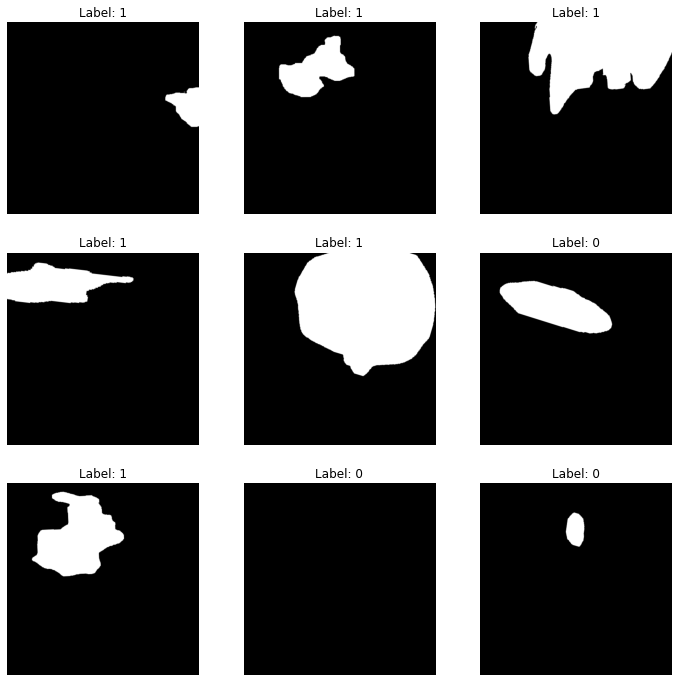

In [16]:
import matplotlib.pyplot as plt

# Get a batch of training images
images, labels = next(train_generator)

# Plot some images from the batch
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f"Label: {int(labels[i])}")
    plt.axis('off')
plt.show()


# Training a CNN using tensorfflor and 10 epochs

In [17]:
# Definition of the CNN architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, img_channels)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

### Definition of the CNN Architecture:

A Sequential model is created.
Three convolutional layers (Conv2D) followed by max pooling layers (MaxPooling2D) are added to extract features from the images.
The Flatten layer is used to flatten the feature maps into a single vector.  
Two dense layers (Dense) are added for classification. ReLU activation is used in the hidden layer, and sigmoid activation is used in the output layer for binary classification.

In [18]:
# Model compiling 
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Model Compilation:  
The model is compiled with the Adam optimizer, binary cross-entropy loss function, and accuracy metric.
### Model Training:  
The model is trained using the fit method with the training generator (*train_generator*) for 10 epochs.  
Validation data (*val_generator*) is used for validation during training.

In [19]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
15/15 [==============================] - 89s 6s/step - loss: 0.8577 - accuracy: 0.5767 - val_loss: 0.5510 - val_accuracy: 0.7708
Epoch 2/10
15/15 [==============================] - 88s 6s/step - loss: 0.5336 - accuracy: 0.7439 - val_loss: 0.5204 - val_accuracy: 0.7812
Epoch 3/10
15/15 [==============================] - 88s 6s/step - loss: 0.4931 - accuracy: 0.7502 - val_loss: 0.4911 - val_accuracy: 0.7812
Epoch 4/10
15/15 [==============================] - 88s 6s/step - loss: 0.4806 - accuracy: 0.7687 - val_loss: 0.4875 - val_accuracy: 0.7500
Epoch 5/10
15/15 [==============================] - 89s 6s/step - loss: 0.5410 - accuracy: 0.7105 - val_loss: 0.5134 - val_accuracy: 0.7708
Epoch 6/10
15/15 [==============================] - 88s 6s/step - loss: 0.4821 - accuracy: 0.8165 - val_loss: 0.4682 - val_accuracy: 0.7500
Epoch 7/10
15/15 [==============================] - 88s 6s/step - loss: 0.4899 - accuracy: 0.7765 - val_loss: 0.5101 - val_accuracy: 0.7188
Epoch 8/10
15/15 [==

# Accuracy and Loss through the epochs

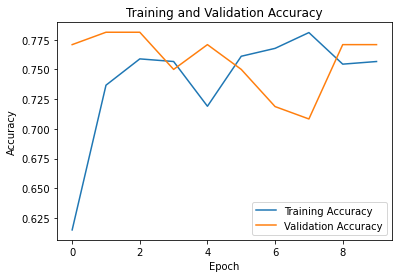

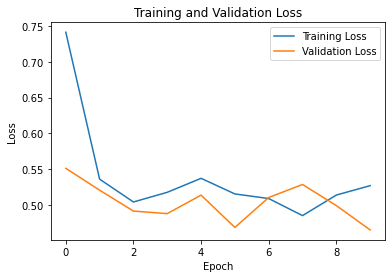

In [20]:
# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Metrics: sensitivity, specificity, accuracy, confusion matrics

In [21]:
# Calcolo delle predizioni sul set di dati di test
y_pred = model.predict(train_generator)
y_pred_binary = (y_pred > 0.5).astype(int)  # Converti le probabilità in valori binari

# Calcolo di sensibilità e specificità
tn, fp, fn, tp = confusion_matrix(train_generator.classes, y_pred_binary).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

In [22]:
print(sensitivity)
print(specificity) 

0.23129251700680273
0.7442622950819672


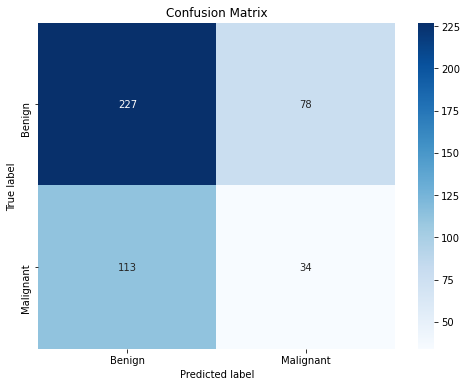

In [24]:
# Plot della matrice di confusione
conf_matrix = confusion_matrix(train_generator.classes, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

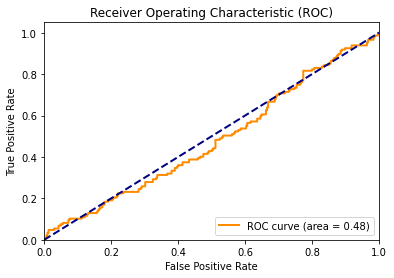

In [25]:
# Calcolo e plot della curva ROC
fpr, tpr, thresholds = roc_curve(train_generator.classes, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

**ROC curve is not a good signal, le AUC is under the line**

# Calculating metrics on test set

Found 99 images belonging to 2 classes.
Confusion Matrix:
[[56 11]
 [19 13]]

Classification Report:
              precision    recall  f1-score   support

      benign       0.75      0.84      0.79        67
   malignant       0.54      0.41      0.46        32

    accuracy                           0.70        99
   macro avg       0.64      0.62      0.63        99
weighted avg       0.68      0.70      0.68        99


Cohen's Kappa:
0.25898203592814373


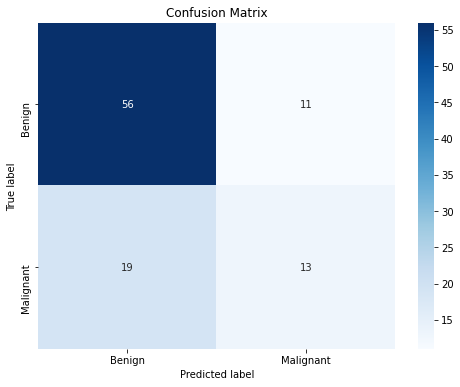

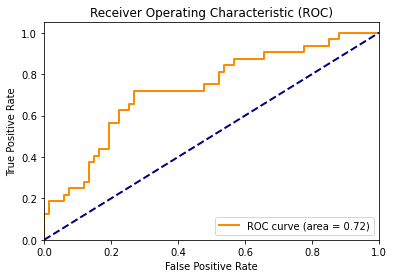

In [26]:
# Definizione del ImageDataGenerator per il test set
test_datagen = ImageDataGenerator(rescale=1./255)

# Caricamento delle immagini di test dal dataset
test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'test'),
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Mantiene l'ordine delle immagini per confronto con le etichette
)

# Predizioni sul test set
y_pred = model.predict(test_generator)
y_pred_binary = (y_pred > 0.5).astype(int)  # Converti le probabilità in valori binari

# Estrai le etichette reali
y_true = test_generator.classes

# Calcola e stampa le metriche di valutazione
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_true, y_pred_binary)
print(conf_matrix)

print("\nClassification Report:")
class_report = classification_report(y_true, y_pred_binary, target_names=test_generator.class_indices.keys())
print(class_report)

print("\nCohen's Kappa:")
cohen_kappa = cohen_kappa_score(y_true, y_pred_binary)
print(cohen_kappa)

# Plot della matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Calcolo e plot della curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# Training a CNN using tensorfflor and 10 epochs

In [27]:
 model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, img_channels)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout layer for regularization
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout layer for regularization
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [28]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
history_20 = model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20
15/15 [==============================] - 107s 7s/step - loss: 0.7130 - accuracy: 0.5833 - val_loss: 0.5929 - val_accuracy: 0.6771
Epoch 2/20
15/15 [==============================] - 107s 7s/step - loss: 0.6035 - accuracy: 0.7088 - val_loss: 0.5396 - val_accuracy: 0.7917
Epoch 3/20
15/15 [==============================] - 107s 7s/step - loss: 0.5177 - accuracy: 0.7803 - val_loss: 0.5358 - val_accuracy: 0.6875
Epoch 4/20
15/15 [==============================] - 107s 7s/step - loss: 0.5537 - accuracy: 0.7309 - val_loss: 0.5322 - val_accuracy: 0.7812
Epoch 5/20
15/15 [==============================] - 105s 7s/step - loss: 0.5643 - accuracy: 0.7304 - val_loss: 0.5060 - val_accuracy: 0.7500
Epoch 6/20
15/15 [==============================] - 106s 7s/step - loss: 0.5567 - accuracy: 0.7006 - val_loss: 0.4893 - val_accuracy: 0.7917
Epoch 7/20
15/15 [==============================] - 105s 7s/step - loss: 0.5027 - accuracy: 0.7700 - val_loss: 0.5402 - val_accuracy: 0.7604
Epoch 8/20
15

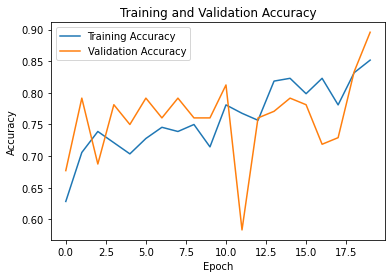

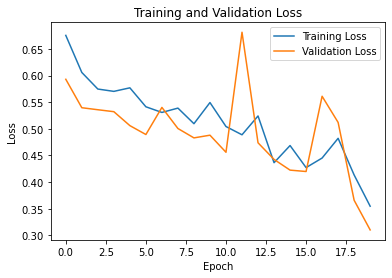

In [30]:
# Plotting training and validation accuracy
plt.plot(history_20.history['accuracy'], label='Training Accuracy')
plt.plot(history_20.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.plot(history_20.history['loss'], label='Training Loss')
plt.plot(history_20.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [39]:
train_predictions = model.predict(train_generator)
train_pred_classes = (train_predictions > 0.5).astype(int).flatten()
train_true_classes = train_generator.classes

In [40]:
train_predictions 
train_pred_classes 
train_true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
# Conferma che le immagini siano normalizzate correttamente
images, labels = next(train_generator)
print(f"Min pixel value: {images.min()}, Max pixel value: {images.max()}")


Min pixel value: 0.0, Max pixel value: 1.0


In [42]:
print(train_predictions[:10])
print(train_pred_classes[:10])
print(train_true_classes[:10])


[[0.02144006]
 [0.01255259]
 [0.0806675 ]
 [0.33380085]
 [0.76998085]
 [0.3300541 ]
 [0.65849423]
 [0.02880111]
 [0.5004514 ]
 [0.32081836]]
[0 0 0 0 1 0 1 0 1 0]
[0 0 0 0 0 0 0 0 0 0]


# PROVA CON THRESHOLD PARI A 0.6

In [46]:
# Calcolo delle predizioni sul set di dati di training con soglia più alta
new_threshold = 0.6  # Imposta una soglia più alta
train_predictions = model.predict(train_generator)
train_pred_classes = (train_predictions > new_threshold).astype(int).flatten()


In [47]:
# Get true labels
train_true_classes = train_generator.classes

In [48]:
# Calculate confusion matrix
conf_matrix_train = confusion_matrix(train_true_classes, train_pred_classes)


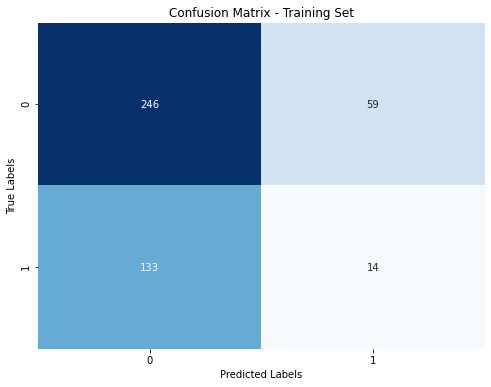

In [49]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Training Set')
plt.show()

In [50]:
# Calculate accuracy
accuracy_train = accuracy_score(train_true_classes, train_pred_classes)

# Calculate sensitivity (recall)
sensitivity_train = recall_score(train_true_classes, train_pred_classes)

# Calculate specificity
tn, fp, fn, tp = conf_matrix_train.ravel()
specificity_train = tn / (tn + fp)

# Calculate Cohen's Kappa
kappa_train = cohen_kappa_score(train_true_classes, train_pred_classes)


In [51]:
# Print evaluation metrics
print("Training Set Metrics:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Sensitivity (Recall): {sensitivity_train:.4f}")
print(f"Specificity: {specificity_train:.4f}")
print(f"Cohen's Kappa: {kappa_train:.4f}")


Training Set Metrics:
Accuracy: 0.5752
Sensitivity (Recall): 0.0952
Specificity: 0.8066
Cohen's Kappa: -0.1129


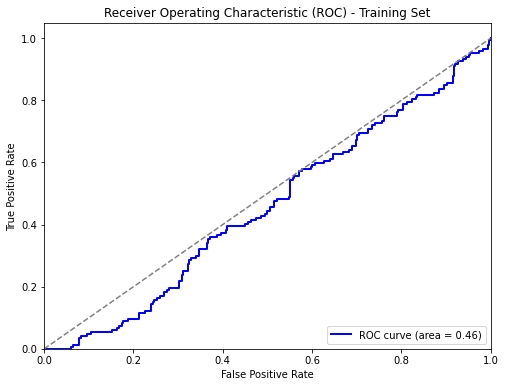

In [52]:
# Calculate ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(train_true_classes, train_predictions)
roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Training Set')
plt.legend(loc='lower right')
plt.show()

# CALCOLO NUOVE METRICHE CON THRESHOLD 0.5

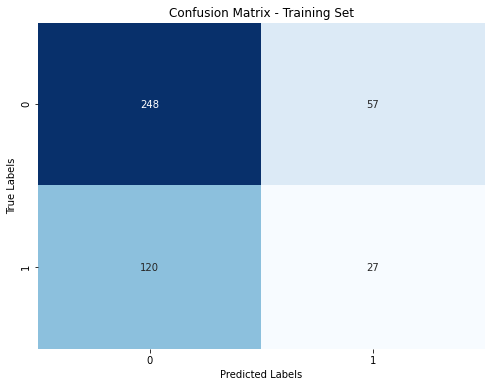

Training Set Metrics:
Accuracy: 0.6084
Sensitivity: 0.1837
Specificity: 0.8131
Cohen's Kappa: -0.0036


In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Make predictions on the training set
train_predictions = model.predict(train_generator)
train_pred_classes = np.round(train_predictions)

# Get true labels
train_true_classes = train_generator.classes

# Calculate confusion matrix
conf_matrix_train = confusion_matrix(train_true_classes, train_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Training Set')
plt.show()

# Calculate accuracy
accuracy_train = np.sum(np.diag(conf_matrix_train)) / np.sum(conf_matrix_train)

# Calculate sensitivity (recall)
sensitivity_train = conf_matrix_train[1, 1] / (conf_matrix_train[1, 1] + conf_matrix_train[1, 0])

# Calculate specificity
specificity_train = conf_matrix_train[0, 0] / (conf_matrix_train[0, 0] + conf_matrix_train[0, 1])

# Calculate Cohen's Kappa
total = np.sum(conf_matrix_train)
p0 = (conf_matrix_train[0, 0] + conf_matrix_train[1, 1]) / total
pe = ((np.sum(conf_matrix_train[0]) * np.sum(conf_matrix_train[:, 0])) / total ** 2) + \
     ((np.sum(conf_matrix_train[1]) * np.sum(conf_matrix_train[:, 1])) / total ** 2)
kappa_train = (p0 - pe) / (1 - pe)

# Print evaluation metrics
print("Training Set Metrics:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Sensitivity: {sensitivity_train:.4f}")
print(f"Specificity: {specificity_train:.4f}")
print(f"Cohen's Kappa: {kappa_train:.4f}")


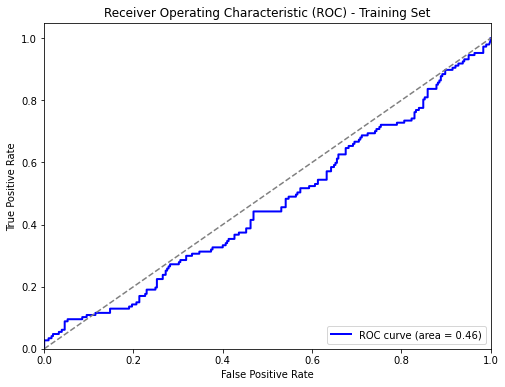

In [32]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(train_true_classes, train_predictions)
roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Training Set')
plt.legend(loc='lower right')
plt.show()


In [33]:
# Make predictions on the test set
test_predictions = model.predict(val_generator)
test_pred_classes = np.round(test_predictions)

# Get true labels for the test set
test_true_classes = val_generator.classes

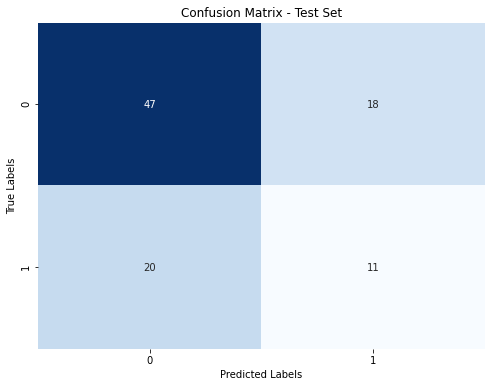

In [34]:
# Calculate confusion matrix for the test set
conf_matrix_test = confusion_matrix(test_true_classes, test_pred_classes)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [35]:
# Calculate accuracy for the test set
accuracy_test = np.sum(np.diag(conf_matrix_test)) / np.sum(conf_matrix_test)

# Calculate sensitivity (recall) for the test set
sensitivity_test = conf_matrix_test[1, 1] / (conf_matrix_test[1, 1] + conf_matrix_test[1, 0])

# Calculate specificity for the test set
specificity_test = conf_matrix_test[0, 0] / (conf_matrix_test[0, 0] + conf_matrix_test[0, 1])

# Calculate Cohen's Kappa for the test set
total_test = np.sum(conf_matrix_test)
p0_test = (conf_matrix_test[0, 0] + conf_matrix_test[1, 1]) / total_test
pe_test = ((np.sum(conf_matrix_test[0]) * np.sum(conf_matrix_test[:, 0])) / total_test ** 2) + \
          ((np.sum(conf_matrix_test[1]) * np.sum(conf_matrix_test[:, 1])) / total_test ** 2)
kappa_test = (p0_test - pe_test) / (1 - pe_test)

In [36]:
# Print evaluation metrics for the test set
print("Test Set Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Sensitivity: {sensitivity_test:.4f}")
print(f"Specificity: {specificity_test:.4f}")
print(f"Cohen's Kappa: {kappa_test:.4f}")

Test Set Metrics:
Accuracy: 0.6042
Sensitivity: 0.3548
Specificity: 0.7231
Cohen's Kappa: 0.0793


In [37]:
# Calculate ROC curve for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(test_true_classes, test_predictions)
roc_auc_test = auc(fpr_test, tpr_test)

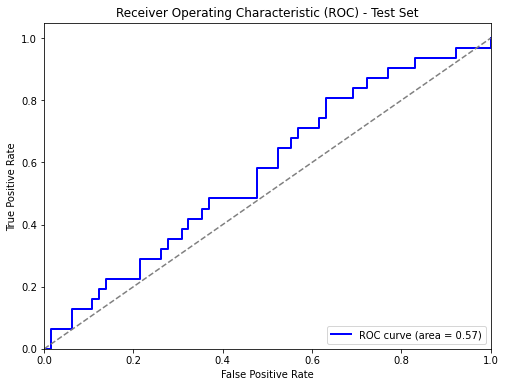

In [38]:
# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc='lower right')
plt.show()